# A Simulated Dataset of a Real-World Phenomenom

## Introduction

The real-world phenomenom that I will be looking at is the relationship between all-cause mortality and either obesity or underweight. Obesity grades 2 and 3 (BMI >/= 35) is associated with an aproximate 30% increase in all-cause mortality compared to normal weight (Ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/). Underweight is associated with a 37% increase in all-cause mortality compared to normal weight (Ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4021191/). All-cause mortality is any cause of death, not just those caused by the specific condition being examined (in this case obesity or underweight) ( Ref - https://www.verywellhealth.com/what-is-all-cause-mortality-2223349). 


Underweight is associated with an increase in mortality due to external factors such as drug and alcohol abuse, smoking and fraility, with smoking being a particular risk factor (Ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4021191/).





This dataset can be used to predict the number of people in a population that will suffer from obesity or underweight and therefore an increase in all-cause mortality.

## Investigation

The variables examined here are as follows:
* Sex (categorical)
* Weight (continuous)
* Height (continuous)
* BMI (continuous)
* BMI Category (categorical)
* Risk of all-cause mortality (categorical)

For sex, there are different mean average weights and heights for males and females. Males on average are heavier and taller than females (Ref - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf). However due to the fact that BMI is calculated from weight/ height^2, the BMI differences between males and females is small (27.5 for males compared to 26.4 for females) (Ref - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)




We'll start by importing some libraries

In [1]:
# Numpy will be used to generate pseudo random distributions 
import numpy as np

# Pandas will be used to create final data set
import pandas as pd

# Matplotlib will be used to plot the distributions
import matplotlib.pyplot as plt

# Skewnorm function from scipy.stats can create skewed normal distributions 
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html#scipy.stats.skewnorm 
from scipy.stats import skewnorm

### Sex ratio

The ratio of males to females in Ireland are:

Aged 15 to 24: 301,114 males and 292,055 females (1.03 m/f)(Reference - https://www.indexmundi.com/ireland/demographics_profile.html)

Aged 25 to 54: 1,087,587 males and 1,077,383 females (1.01 m/f)(Reference - https://www.indexmundi.com/ireland/demographics_profile.html)

Aged 55 to 64: 261,650 males and 260,737 females (1 m/f)(Reference - https://www.indexmundi.com/ireland/demographics_profile.html)


Young males out number young females due to the fact that female mortality during pregnancy is higher than for males (Ref - https://www.pnas.org/content/112/16/E2102). The ratio of males to females reduces as age increaeses due to factors such as war and health (Ref - https://en.wikipedia.org/wiki/Human_sex_ratio#Factors_affecting_sex_ratio_in_humans).


In [2]:
# Number of males and females in Ireland aged 15 to 64 years old
males = 301114 + 1087587 + 261650
females = 292055 + 1077383 + 260737

# Total number of adults in Ireland aged 15 to 64 years old
total = males + females

# Displaying the results
print(f"The number of males aged 15 to 64 in Ireland is {males}")
print(f"The number of females aged 15 to 64 in Ireland is {females}")
print(f"The total number of males and females aged 15 to 64 in Ireland is {total}")      

The number of males aged 15 to 64 in Ireland is 1650351
The number of females aged 15 to 64 in Ireland is 1630175
The total number of males and females aged 15 to 64 in Ireland is 3280526


In [3]:
# Proportion of males in Ireland aged 15 to 64
proportionOfMales = males/total

# Proportion of females in Ireland aged 15 to 64
proportionOfFemales = females/total

# Displaying the proportion of males
print(f"The proportion of males is {proportionOfMales}")

# Displaying the proportion of females
print(f"The proportion of females is {proportionOfFemales}")

The proportion of males is 0.5030751166123969
The proportion of females is 0.4969248833876031


The figures below for weight and height are for 18 to 64 year olds. Here an assumption will be made that the ratio for males to females in Ireland aged 18 to 64 year olds will be the same as 15 to 64 year olds. However, as can be seen from the ratios above, the number of males to females decreases as age increases (1.03 for 15 to 24 year olds, 1.01 for 25 to 54 and 1.00 55 to 64 years).

We can now create a random sample of 1000 people which will have the same ratio of males to females as was found above

In [4]:
# Creating a 1D array with male and female as the elements

sex =["male", "female"]

sampleSize = 2000

sexArray = np.random.choice(sex, sampleSize, p=[proportionOfMales, proportionOfFemales])

unique, count = np.unique(sexArray, return_counts=True)

femaleCount, maleCount = count[0], count[1]

print(f"The unique elements in the array are: {unique}")
print(f"There are {femaleCount} females and {maleCount} males")

The unique elements in the array are: ['female' 'male']
There are 976 females and 1024 males


### Weight

Mean adult (18 to 64 years old) male body weight is 86.2 kg with a standard deviation of 15.0 kg. (Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)

Mean adult (18 to 64 years old) female bodyweight is 70.0 kg with a standard deviation of 13.7 kg. (Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)

In [5]:
# Assigning variables for mean weight and standard deviation for males
meanMaleWeight, maleWeightSD = 86.2, 15.0

# Assigning variables for mean weight and standard deviation for females
meanFemaleWeight, femaleWeightSD = 70.0, 13.7

The median values for males and females are 85.1 kg and 67.5 kg respectively. The distributions for weight for males and females are therefore are both positively skewed. We can also see this by examining the 5th and 95th percentiles. For males these are 64.0 kg and 112.6 kg, respectively(Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf). For females, these are 52.2 kg and 96.3 kg respectively(Reference - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf). 

The differences between these and their respective medians can be calculated as follows:

In [6]:
# Assigning median, 5th perentile and 95th percentile
maleMedian, male5th, male95th = 85.1, 64.0, 112.6
femaleMedian, female5th, female95th = 67.5, 52.2, 96.3

# Calculating difference between medians and 5th and 95th percentile
male5thdiff = male5th - maleMedian
male95thdiff = male95th - maleMedian

female5thdiff =  female5th - femaleMedian
female95thdiff = female95th - femaleMedian

print(f"The difference between the median body weight for males and the 5th and 95th percentiles are:")
print(f"5th percentile: {male5thdiff}")
print(f"95th percentile: {male95thdiff}")

print(f"The difference between the median body weight for females and the 5th and 95th percentiles are:")
print(f"5th percentile: {female5thdiff}")
print(f"95th percentile: {female95thdiff}")

The difference between the median body weight for males and the 5th and 95th percentiles are:
5th percentile: -21.099999999999994
95th percentile: 27.5
The difference between the median body weight for females and the 5th and 95th percentiles are:
5th percentile: -15.299999999999997
95th percentile: 28.799999999999997


This also shows that body weight is not normally distributed but is instead positively skewed.

A study of German, Norwegian and Austrian conscripts also found that body weight is not normally distributed. 

(Reference - https://www.ncbi.nlm.nih.gov/pubmed/11673780)

There may be a diproportionately larger number of obese people than underweight (therefore leading to the positive skewness) due to the fact that the more a person weighs the easier it then is for them to gain even more weight. (Reference - https://www.researchgate.net/publication/7006581_The_Changing_Shape_of_the_Body_Mass_Index_Distribution_Curve_in_the_Population_Implications_for_Public_Health_Policy_to_Reduce_the_Prevalence_of_Adult_Obesity)

The 5th and 95th percentile weights are important as these extremes are where underweight and obesity 2 and above are seen (underweight is the 0.7 percentile and obesity 2 and above is in the 94.4 percentile) (Ref - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)
Firstly we will start by creating a function that will return the 5th and 95th percentiles so that we can compare these for normally distributed and skewed normally distributed.

In [7]:
# Creating a function to return the 5th and 95th percentiles for male and female weight distributions
# and the difference from the real value

def percentiles5and95(maleDist, femaleDist, typeOfDist):
    # Assigning the 5th percentile for male and female weight distributions
    male5thDist = np.percentile(maleDist, 5)
    female5thDist = np.percentile(femaleDist, 5)
    
    #Assigning the 95th percentile for male and female weight distributions
    male95thDist = np.percentile(maleDist, 95)
    female95thDist = np.percentile(femaleDist, 95)
    
    # Displaying the results 
    print(f"The 5th percentile for {typeOfDist} male weight is: {male5thDist}")
    print(f"(difference from real value is: {male5thDist-male5th})\n")
    
    print(f"The 95th percentile for {typeOfDist} male weight is: {male95thDist}")
    print(f"(difference from real value is: {male95thDist-male95th})\n")
    
    print(f"The 5th percentile for {typeOfDist} female weight is: {female5thDist}")
    print(f"(difference from real value is: {female5thDist-female5th})\n")
    
    print(f"The 95th percentile for {typeOfDist} female weight is: {female95thDist}")
    print(f"(difference from real value is: {female95thDist-female95th})")

Now we will create a normal distribution for male and female weights:

(array([  16.,   36.,   75.,  160.,  196.,  197.,  152.,   82.,   45.,   17.]),
 array([  33.23619303,   40.53744319,   47.83869334,   55.13994349,
          62.44119365,   69.7424438 ,   77.04369395,   84.34494411,
          91.64619426,   98.94744441,  106.24869457]),
 <a list of 10 Patch objects>)

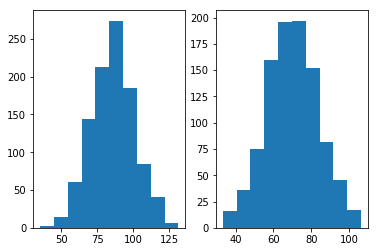

In [8]:
# Creating a random Normally distributed array for male and female weight
# The size of the distribution for each sex is equal to the count of males or females from the sexArray above
maleWeightDist = np.random.normal(meanMaleWeight, maleWeightSD, maleCount)
femaleWeightDist = np.random.normal(meanFemaleWeight, femaleWeightSD, femaleCount)


# Displaying the male and female weights on a histogram
plt.subplot(121)
plt.hist(maleWeightDist)

plt.subplot(122)
plt.hist(femaleWeightDist)

Calling the function created above to display the 5th and 95th percentiles shows how the extremes for these distributions differ from the real values:

In [9]:
percentiles5and95(maleWeightDist, femaleWeightDist, "normally distrubuted")

The 5th percentile for normally distrubuted male weight is: 60.769278419664175
(difference from real value is: -3.2307215803358247)

The 95th percentile for normally distrubuted male weight is: 111.3405492789559
(difference from real value is: -1.2594507210440895)

The 5th percentile for normally distrubuted female weight is: 47.4939611001861
(difference from real value is: -4.706038899813905)

The 95th percentile for normally distrubuted female weight is: 92.6302965759686
(difference from real value is: -3.669703424031397)


As would be expected, the results are lower than the positively skewed real values. Also the female values are more skewed than the male values.

We can create a positively skewed distribution using the following code:

(array([   7.,   18.,   57.,  147.,  225.,  215.,  175.,   86.,   37.,    9.]),
 array([  31.30729896,   39.43537765,   47.56345633,   55.69153502,
          63.81961371,   71.94769239,   80.07577108,   88.20384977,
          96.33192845,  104.46000714,  112.58808583]),
 <a list of 10 Patch objects>)

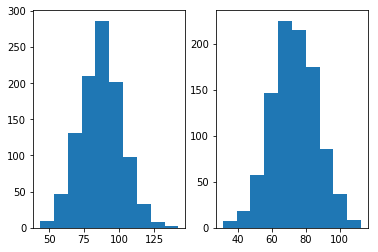

In [10]:
# Creating a skewed normal distribution for male weight with a skewness factor of 0.1
# The size of the distribution for males is equal to the count of males from the sexArray above
maleWeightSkewedDist = skewnorm.rvs(0.1, loc=meanMaleWeight, scale=maleWeightSD, size=maleCount)

# Creating a skewed normal distribution for female weight with a skewness factor of 0.4
# The size of the distribution for females is equal to the count of females from the sexArray above
femaleWeightSkewedDist = skewnorm.rvs(0.4, loc=meanFemaleWeight, scale=femaleWeightSD, size=femaleCount)

# Plotting the skewed normal male and female weight distributions
plt.subplot(121)
plt.hist(maleWeightSkewedDist)

plt.subplot(122)
plt.hist(femaleWeightSkewedDist)

Calling the function to display the 5th and 95th percentiles on the skewed normal distribution will give us results that are closer to the real results for the extremes of underweight and obesity 2 and above compared to the normal distribution:

In [11]:
percentiles5and95(maleWeightSkewedDist, femaleWeightSkewedDist, "skewed normally distrubuted")

The 5th percentile for skewed normally distrubuted male weight is: 62.449028762570634
(difference from real value is: -1.5509712374293656)

The 95th percentile for skewed normally distrubuted male weight is: 111.59880735940537
(difference from real value is: -1.001192640594624)

The 5th percentile for skewed normally distrubuted female weight is: 51.90218325720479
(difference from real value is: -0.297816742795213)

The 95th percentile for skewed normally distrubuted female weight is: 95.31952492283939
(difference from real value is: -0.9804750771606052)


### Height

Human height is normally distributed (Ref - https://www.johndcook.com/blog/2008/07/20/why-heights-are-normally-distributed/). The reason for this is that there are many genetic and envirnomental factors that are involved in height which leads to the large variation (Ref https://www.johndcook.com/blog/2008/07/20/why-heights-are-normally-distributed/).

Mean adult (18 to 64 years old) male height is 1.77 m with a standard deviation of 0.07 m. (Ref - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)
Mean adult (18 to 64 years old) female height is 1.63 m with a standard deviation of 0.06 m. (Ref - https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20%282008-2010%29.pdf)

In [12]:
# Setting height variables
maleHeight, femaleHeight = 1.77, 1.63
maleHeightSD, femaleHeightSD = 0.07, 0.06

(array([  11.,   36.,  108.,  163.,  242.,  183.,  129.,   72.,   25.,    7.]),
 array([ 1.4593844 ,  1.49490307,  1.53042174,  1.56594041,  1.60145908,
         1.63697774,  1.67249641,  1.70801508,  1.74353375,  1.77905242,
         1.81457109]),
 <a list of 10 Patch objects>)

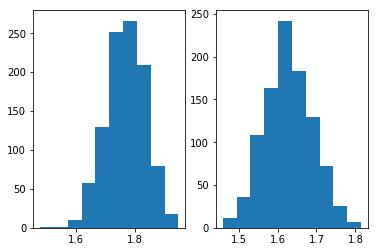

In [13]:
# Creating height distributions
# The size of the distribution for males and females is equal to the count of males or females from the sexArray above
maleHeightDist = np.random.normal(maleHeight, maleHeightSD, maleCount)
femaleHeightDist = np.random.normal(femaleHeight, femaleHeightSD, femaleCount)

# Plotting distributions on a histogram
plt.subplot(121)
plt.hist(maleHeightDist)

plt.subplot(122)
plt.hist(femaleHeightDist)

### BMI

BMI is calculated using the following formula weight(kg)/height(m)^2 (Ref - https://journals.lww.com/nutritiontodayonline/Fulltext/2015/05000/Body_Mass_Index__Obesity,_BMI,_and_Health_A.5.aspx) 

This formula was developed by Dr Quetelet in 1835 ( Ref - https://journals.lww.com/nutritiontodayonline/Fulltext/2015/05000/Body_Mass_Index__Obesity,_BMI,_and_Health_A.5.aspx). 

The reason why height is squared is that this reduces the effect of leg length which can reduce the weight/height ratio ( Ref - https://journals.lww.com/nutritiontodayonline/Fulltext/2015/05000/Body_Mass_Index__Obesity,_BMI,_and_Health_A.5.aspx)

BMI has a number of limitations such as not differentiating between muscle mass and fat mass, and not scaling well for short and tall people ( Ref - https://en.wikipedia.org/wiki/Body_mass_index)

We can create a BMI array from the weight array and height arrays above.

(array([   7.,   28.,   88.,  177.,  241.,  197.,  145.,   66.,   21.,    6.]),
 array([ 11.86377247,  15.16469932,  18.46562616,  21.76655301,
         25.06747985,  28.36840669,  31.66933354,  34.97026038,
         38.27118723,  41.57211407,  44.87304092]),
 <a list of 10 Patch objects>)

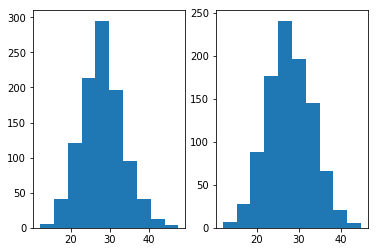

In [14]:
# Creating BMI variable for males from weight and height distributions
maleBMI = maleWeightSkewedDist/maleHeightDist**2

# Creating BMI variable for females from weight and height distributions
femaleBMI = femaleWeightSkewedDist/femaleHeightDist**2

# Plotting BMI on a histogram
plt.subplot(121)
plt.hist(maleBMI)

plt.subplot(122)
plt.hist(femaleBMI)

### BMI Categories

There are 11 different BMI categories ( Ref - https://en.wikipedia.org/wiki/Body_mass_index.)

For this data set we will only look at 6:
* Underweight (BMI of <18.5)
* Normal (BMI of 18.5-<25.0)
* Overweight (BMI of 25.0-<30.0)
* Obese 1 (BMI of 30.0-<35.0)
* Obese 2 (BMI of 35.0-<40.0)
* Obese 3 (BMI of >/=40.0)

In [15]:
# Creating categorical array from a continuous array
# Adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html#pandas.cut
# and from https://pandas.pydata.org/pandas-docs/stable/categorical.html

# Creating a DataFrame with a column called Male BMI containing the maleBMI array created above
df = pd.DataFrame({'maleBMI': maleBMI})

# Creating an array which contains the 6 different BMI categories
BMICategories = ["Underweight", "Normal", "Overweight", "Obese 1", "Obese 2", "Obese 3"]

# Assigning the categories to their respective BMI ranges
BMICatArray = pd.cut(df.maleBMI, [0.0, 18.5, 25.0, 30.0, 35.0, 40.0, 1000.0], labels=BMICategories, retbins=True, right=False)

# Creating a new column in DataFrame called 'maleBMICat' and assigning it the BMICatArray
df['maleBMICat'] =BMICatArray[0]

# Displaying the top 5 values
df.head(5)

,maleBMI,maleBMICat
0,42.690644,Obese 3
1,20.746849,Normal
2,18.996096,Normal
3,28.025166,Overweight
4,32.817582,Obese 1


### All-Cause Mortality Hazard Ratios

The hazard ratios for all-cause mortality have been studied for people who are overweight, obese and underweight. The hazard ratio for these weight categories are relative to normal weight (Ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/ and https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4021191/). The hazard ratios are as follows:
Underweight = 1.37 (Ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4021191/)
Normal = 1 (hazard ratios are relative to normal so this will have a HR of 1)
Overweight = 0.94 (ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/)
Obese 1 = 0.95 (ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/)
Obese 2 and above = 1.29 (ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/)

For Obese 1 the value is below 1, therefore it might be assumed that this represents a reduction in all-cause mortality. However, this value is within the margin of error (ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/).

Surprisingly, being overweight was found to be significantly associated with a lower risk of all cause mortality relative to normal weight. (Ref - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4855514/)

In [16]:
# Creating categorical array from a continuous array
# Adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html#pandas.cut
# and from https://pandas.pydata.org/pandas-docs/stable/categorical.html

# Creating array with Hazard Ratios
HRCategories = [1.37, 1, 0.94, 0.95, 1.29]

# Assigning the categories to their respective BMI ranges
HRArray = pd.cut(maleBMI, [0.0, 18.5, 25.0, 30.0, 35.0, 1000.0], labels=HRCategories, retbins=True, right=False)

# Displaying the array
HRArray

([1.29, 1.00, 1.00, 0.94, 0.95, ..., 1.00, 1.29, 1.00, 0.94, 0.95]
 Length: 1024
 Categories (5, float64): [1.37 < 1.00 < 0.94 < 0.95 < 1.29],
 array([    0. ,    18.5,    25. ,    30. ,    35. ,  1000. ]))

## Simulating the Dataset

Finally we will simulate the entire dataset adding each array created above.

### Sex

In [17]:
# Creating the DataFrame and adding the Sex column with data from the sexArray

simdf = pd.DataFrame({"Sex": sexArray})

simdf.head(5)

,Sex
0,female
1,female
2,male
3,female
4,female


### Weight

In [18]:
# Adapted from https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column
# and https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column

# Creating a male subset
maledf = simdf.loc[simdf['Sex'] == 'male']

# Creating a female subset
femaledf = simdf.loc[simdf['Sex'] == 'female']

# Creating an index from the male subset
maleRowIndex = maledf.index

# Creating an index from the female subset
femaleRowIndex = femaledf.index

# Initialising Weight column
simdf['Weight'] = 0

# Adding male weights to male rows
simdf['Weight'].loc[simdf['Sex'] == 'male'] = pd.Series(maleWeightSkewedDist, index=maleRowIndex)

# Adding female weights to male rows
simdf['Weight'].loc[simdf['Sex'] == 'female'] = pd.Series(femaleWeightSkewedDist, index=femaleRowIndex)

simdf.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Sex,Weight
0,female,86.666727
1,female,84.472507
2,male,121.516086
3,female,87.888801
4,female,67.073350


### Height

In [19]:
# Initialising height column
simdf['Height'] = 0

# Adding male heights to male rows
simdf['Height'].loc[simdf['Sex'] == 'male'] = pd.Series(maleHeightDist, index=maleRowIndex)

# Adding female heights to male rows
simdf['Height'].loc[simdf['Sex'] == 'female'] = pd.Series(femaleHeightDist, index=femaleRowIndex)

simdf.head(5)

,Sex,Weight,Height
0,female,86.666727,1.652032
1,female,84.472507,1.614780
2,male,121.516086,1.687138
3,female,87.888801,1.625213
4,female,67.073350,1.627871


### BMI

In [20]:
simdf['BMI'] = simdf['Weight']/(simdf['Height'])**2

simdf.head(5)

,Sex,Weight,Height,BMI
0,female,86.666727,1.652032,31.755257
1,female,84.472507,1.614780,32.395783
2,male,121.516086,1.687138,42.690644
3,female,87.888801,1.625213,33.274590
4,female,67.073350,1.627871,25.311052


### BMI Category

In [21]:
BMICategories = ["Underweight", "Normal", "Overweight", "Obese 1", "Obese 2", "Obese 3"]

BMICategoryArray = pd.cut(simdf.BMI, [0.0, 18.5, 25.0, 30.0, 35.0, 40.0, 1000.0], labels=BMICategories, retbins=True, right=False)

simdf['BMI Category'] = BMICategoryArray[0]

simdf.head(5)

,Sex,Weight,Height,BMI,BMI Category
0,female,86.666727,1.652032,31.755257,Obese 1
1,female,84.472507,1.614780,32.395783,Obese 1
2,male,121.516086,1.687138,42.690644,Obese 3
3,female,87.888801,1.625213,33.274590,Obese 1
4,female,67.073350,1.627871,25.311052,Overweight


### Hazard Ratio Category

In [22]:
HRCategories = [1.37, 1, 0.94, 0.95, 1.29]

HRArray = pd.cut(simdf.BMI, [0.0, 18.5, 25.0, 30.0, 35.0, 1000.0], labels=HRCategories, retbins=True, right=False)

# HRArray returns a 2D array, first row (index 0) contains the values
simdf['Hazard Ratio'] = HRArray[0]

simdf.head(5)

,Sex,Weight,Height,BMI,BMI Category,Hazard Ratio
0,female,86.666727,1.652032,31.755257,Obese 1,0.95
1,female,84.472507,1.614780,32.395783,Obese 1,0.95
2,male,121.516086,1.687138,42.690644,Obese 3,1.29
3,female,87.888801,1.625213,33.274590,Obese 1,0.95
4,female,67.073350,1.627871,25.311052,Overweight,0.94


## Conclusion

Percentage in ireland with obesity

https://www.safefood.eu/SafeFood/media/SafeFoodLibrary/Documents/Professional/Nutrition/Adult-and-children-obesity-trends-ROI.pdf
